# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [3]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

* The simulation starts up. 
* The dummy agents are moving around randomly. 
* The SmartCab indicated by white with a Udacity logo on top does not move at all during the simulation.  
* The training trial keeps increasing after a period of time steps. 

***Rewards***
* The SmartCab agent gets positive rewards based on idling while 
    * it is a red light  
    * it is a green light and there is oncoming traffic.  

* The agent is gets negative rewards when it does not move on green provided there is no oncoming traffic.


### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

1. In `agent.py`, 
    * The `grid_size` flag can be set to change the environment instance that it creates to have a value other than the default value of (8,6).  
    eg:  `env = Environment(grid_size = (8,5))` This sets the colums, rows to 8 and 5 respectively.
    * The `num_dummies` flag can be set to change the number of dummy agents in the environment instance to have different number of dummy agents (cars that go about minding their business)
    * The `display` can be set to `False` so that no simulation shows up.  
    eg:  `sim = Simulator(env, update_delay=0.001, display=False)`
2. The function `def act(self, agent, action):` is called in *Environment* class when the agent performs an action. This function returns the reward after the calculations.
3. `render_text()` prints the results and step by step actions to the console whereas `render_function()` displays the results and actions in the simulation if the display flag is `True`.
4. In the `planner.py` Python file, the `'next_waypoint()` function considers the East-West direction first.


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


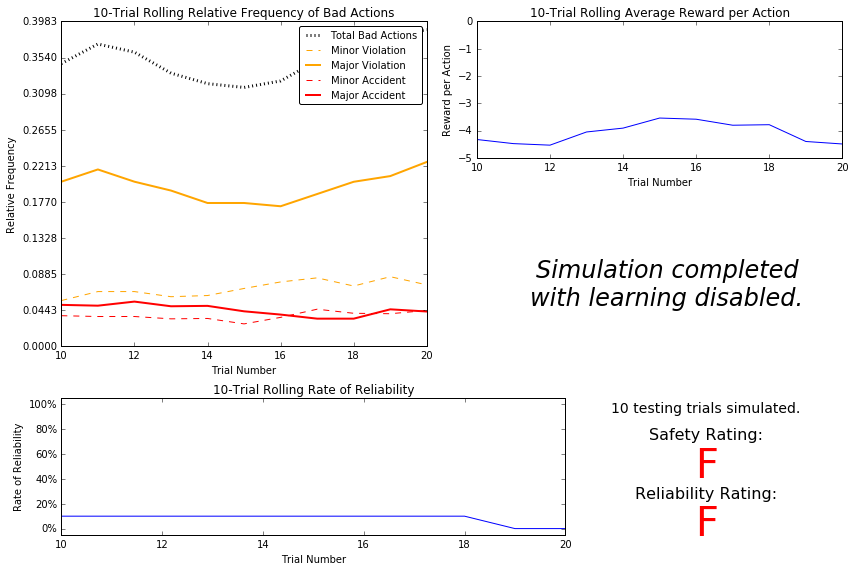

In [24]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

The Smartcab (not yet smart), makes a lot of mistakes.  
* The relative frequency of **total bad decisions** is around 0.3540$\pm$.05  every trial.  
* The relative frequency of **Major Violations** is around 0.20$\pm$.03  every trial.  
* The relative frequency of **Minor Violations** is around 0.060$\pm$.03  every trial.  
* The relative frequency of **Major Accident** is around 0.040$\pm$.03  every trial.  
* The relative frequency of **Minor Accident**  is around 0.030$\pm$.03  every trial.  

Major violations and major accidents are all very common. This makes up for a highly unreliable and unsafe Smartcab. As the agent is driving around randomly without learning about the traffic lights or other cars, this sort of reliability and safety is expected. The car does not make any effort in reaching its goal nor drive safely. 

Since the cab is driving around randomly, the agent gets rewards based on the random actions. At times the cab takes a good action randomly, for such actions the agent gets rewarded positively. But the agent does not do anything with that reward. There are two aspects to learning or specifically Q-learning. Exploration and Exploitation. In this, the agent just explores all the time without learning anything.

For most actions the smartcab is penalised between -4.0 to -5.0 reward points. Which suggests that in almost all cases, the Smartcab is penalised close to the maximum penalty possible.

As the trials increases, the results don't change a lot, it just follows a regular trend as mentioned above in bullet points. It does not get better not worse.

We have received a rating of **F in Reliability** and **F in Safety** mostly due to the erratic behaviour and random choices at all points, **This clearly indicates that this car is extremely useless and dangerous for transporting any person, animal, plant or thing.**


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:** 

The features I have selected are:
* Waypoints from `self.planner.next_waypoint()` function returns the direction to travel. This feature is appropriate because at every step the updated waypoint is necessary for any car to reach its destination. So that it knows where to turn next. Without this the car will not have a goal. This information is essential for improved reliability.
* Inputs from `self.env.sense(self)` which returns the intersection lights and traffic. This function returns a dictionary of items in this manner  
eg: `{'light': 'red', 'oncoming': 'left', 'left': 'right', 'right': None}`  
This information is highly essential to learn the safety requirements of driving a car.

These two inputs together as a tuple will consist the states, and these states can be used to teach the car safety and efficiency.

Including deadline is not good in this scenario. The car performs badly when we train with the deadline. Also, the deadline is a number which reduces with every step. This does not provide any added information for the car to act. Moreover having a deadline will make the car not work safely, The car might just take unsafe turns to get to the location which will reduce the safety.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

My state space is a tuple of waypoint and inputs ie. `state = (waypoint, inputs)` 

In the `waypoint` the values can theoretically take up `None`, `left`, `right`, `forward`, Therefore 4 states.

The `inputs` is a dictionary with values similar to this `{'light': 'red', 'oncoming': 'None', 'left': 'right', 'right': forward}`  

In this `inputs`,
* The `light` key can take up values  `red` or `green`. Therefore 2 states.  
* The `oncoming` key can take up values `None`, `left`, `right` and `forward`. Therefore 4 states.  
* The `left` key can take up values `None`, `left`, `right` and `forward`. Therefore 4 states.  
* The `right` key can take up values `None`, `left`, `right` and `forward`. Therefore 4 states.  

Since my state space is a tuple of waypoint, inputs. It will look like this.  
`('forward', {'light': 'green', 'oncoming': 'right', 'left': 'left','right': None})`

There should be state spaces resulting in a combination of 4 waypoints, 2 traffic light, 4 oncoming, 4 left and 4 right. which total 

$$ 4*2*4*4*4 = 512 $$

But furthur examination of the program it can be seen that the `self.planner.next_waypoint` will never return `None` as a waypoint. 

So , the total number of states is 

$$ 3*2*4*4*4 = 384 $$

A furthur optimization to reduce the states would be to disregard the `right` key in the inputs dictionary since the agent can learn that it is not supposed to go through the intersection when the light is red , on top of that when the light is green we the agent has the right of way if the `right` dummy agent is turning right. So we can omit the `right` key from the inputs. Deleting that key value entry and creating the inputs this way would reduce our state space furthur. it will look similar to this.

`('forward', {'light': 'green', 'oncoming': 'right', 'left': 'left'})`

In this case  , I will have state spaces resulting in a combination of 3 waypoints, 2 traffic lights, 4 oncoming and 4 left. 

Now this would total to 
$$ 3*2*4*4 = 96 $$

Since there are 96 states, 20 trials is far too less to learn a policy. But if we increase those trials to a slightly larger number maybe 200 - 300 iterations, We can touch all different states and thus a good policy can be learned.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

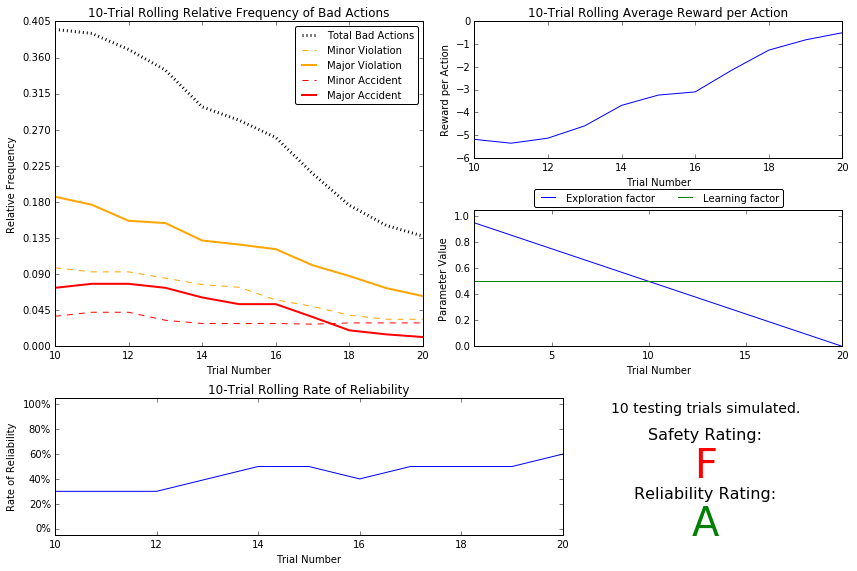

In [25]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

The Smartcab (getting smarter), still does make mistakes. But there is a gradual decline in the relative frequency of mistakes as the number of trials goes up. 

* The relative frequency of **total bad decisions** drops by almost 50-60% by the end of all trials.
* The relative frequency of **Major Violations** also drops.
* The relative frequency of **Minor Violations** also drops.
* The relative frequency of **Major Accident** also drops considerably to around 0.01.
* The relative frequency of **Minor Accident**  though is not affected a lot, it also seems to be on the downward path.

All in all, this indicates that the Smartcab agent is learning from its mistakes and trying to maximise the rewards that it gets thereby getting better as trials increase.

The reliability rating has shot up to A but the safety rating is still F. It seems our driving agent has now learned how to act on waypoints but not how to drive safe from the inputs yet. Maybe if we increase the number of trials the safety of the driving agent will go up. 

* When compared to the earlier non-learning agent, the similarity I can see is that both of them are not safe, but this agent at least reaches the destination reliably most of the times.

* The driving agent took 20 trials to train before testing. This is because I set the epsilon to start at 1.0  and reduce it by 0.05 every trial. The tolerance was kept at 0.05 default value. Therefore by calculating the decay, it makes perfect sense. It would always take 20 trials before it goes into testing if we use this decay function. 

* The decaying agent is accurately presented in the top left of the simulation. The alpha rate is also displayed beneath it. 

* As the number of trials increased the average reward started increasing as seen in the graph, it almost reached 0. Total bad actions decreased drastically. This points to the fact that our agent is learning. The reliability of the vehicle also seems to have increased as the trials go up. 

* When compared to the initial driving agent . This is far better but though our car is somewhat reliable. Violations and accidents are common. This makes up for an unsafe Smartcab. We need more trials to let to the car learn more about safety.

With respect to Exploration and Exploitation. our car starts to exploit on the learned states with greater probablity after 10 trials.

To conclude, we have received a rating of **A in Reliability** and **F in Safety** as it would be easier to take decisions based on waypoints as there are only 3, but to learn safety it requires more trials as there more states to see. Moreover, in the current simulation the driving agent was only able to learn about 76 Q-states of the total 96. Thereby missing out on some states which might help the agent learn more about safety. Increasing the number of trials would be the easiest way to include those missing states and learn better.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

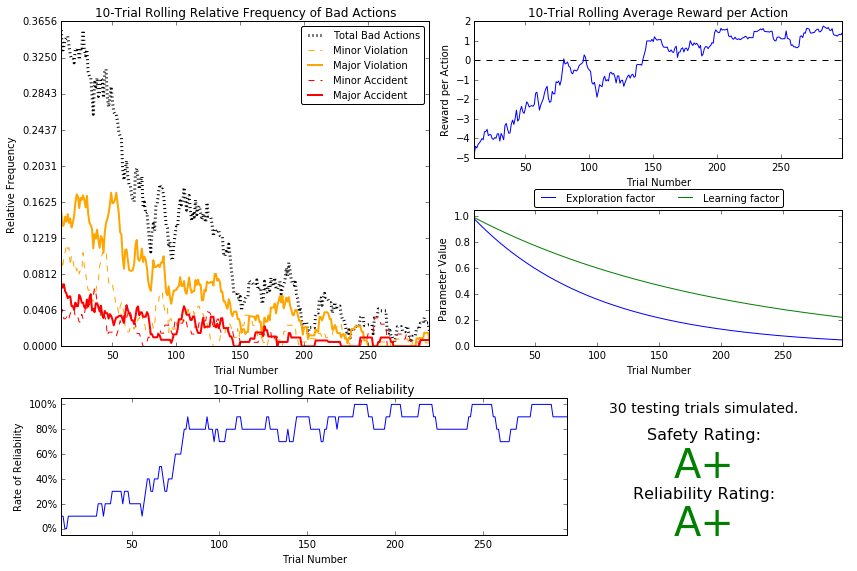

In [27]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
The Smartcab (is now smart), makes very less mistakes. The increased number of trails did help the agent learn a lot about the states. Especially the states that mattered to safety.

* The relative frequency of all **Bad actions** drops to almost 0.02 by the end of all trials. This shows that the Smartcab is now Safe and Reliable.  


* This is the decaying function that I used for epsilon.
$$ \epsilon = a^t, \textrm{for } 0 < a < 1 $$ 
I was getting the best results with this decay function moreover the others were either decaying too fast ie  $\epsilon = \frac{1}{t^2}$ or random selection of the state would be higher that I would like it to be as the curve of the function ie  $\epsilon = \cos(at)$ is more of a convex nature. Dips fast after a point, and until that the randomness is high.  
For the epsilon, the starting value of epsilon was at 1.0, The a selected for the decay function is at .99 over around 300 trials.  
I also used the same decay function for alpha. The starting value of alpha set at 0.7. Decay with the same decay function with a as .995. I used the decay function for alpha in order to increase the learning rate for the initial trials and then slowly decay.


* My driving agent required almost 300 trials before it started testing. 


* My epsilon - tolerance rate was at 0.05. I wanted the agent to learn more until the Bad Actions were relatively less. The alpha (Learning Rate) used was at 0.5. 


* The improvement for this Q-Learner was drastic. Both the Safety and Reliability Rating has shot up to A+.  
After about 200 trials, The reliability was in between 100-80%.  
The reward per action was positive after 140 trials. 
The decay function is quadratic, not linear. which provides more trials before it reaches the 0.05 epsilon - tolerance


* The Q- Learner results do show that my driving agent has learned appropriate policies. For the given states it has optimized the action that it should take by increasing the Q- value for a particular action. For examples please see next question in which I describe my optimal policies.


* A+ in both safety and reliability. if we check the logs. We can see that while testing. The agent reaches its goal always. The rewards are always positive. This is a good indication that our agent has learned to act safely and reliably. I would say that I am satisfied with the performance except for the fact that it takes quite a long time to reach this position. 300 Trials is slightly on the higher end I feel.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

Some of the states from my State Space are shown below with explanation.

1. In this state.  
    `('right', {'light': 'red', 'oncoming': 'right', 'left': 'left'})`
    
    The optimal policy would be to move right 
    * as waypoint is right
    * the light is red
    * the left car is going left.  
    * Now from our logs. This state has highest Q-Value for right which is **correct**.  
   
   `('right', {'light': 'red', 'oncoming': 'right', 'left': 'left'})  
     -- forward : -8.01  
     -- right : 0.25  
     -- None : 0.00  
     -- left : 0.00`  
     
2. In this state.  
    `('forward', {'light': 'green', 'oncoming': 'forward', 'left': 'left'})` 
    
    The optimal policy would be to move forward 
    * as waypoint is forward
    * the light is green
    * the oncoming car is going forward.
    * the left car will be stopped by the traffic light, even though it wants to go left.
    
    * Now from our logs. This state has highest Q-Value for right turn which is **wrong**. This behavious is because left car is moving left. So it trying to optimize safety in this step and move right and be more cautious.
   
   `('forward', {'light': 'green', 'oncoming': 'forward', 'left': 'left'})
     -- forward : 0.63  
     -- right : 0.71  
     -- None : 0.00  
     -- left : -18.08`
     
3. In this state.  
    `('left', {'light': 'red', 'oncoming': 'right', 'left': None})`
    
    The optimal policy would be to not move, Therefore None. 
    * the light is red
    * as Waypoint is left.
    
    * Now from our logs. This state has highest Q-Value for None which is **correct**.
   
   `('left', {'light': 'red', 'oncoming': 'right', 'left': None})
     -- forward : -9.44  
     -- right : 0.32  
     -- None : 2.14  
     -- left : -39.45`  



-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

The two characteristics I think that invalidate the use of gamma for future rewards are:

1. The strategy in this environment is that you move to the next waypoint if the lights and traffic are in favour. Also, you don't move if it's illegal. This has nothing to do with next state which can have random cars here and there and a changed light.  

2. The state does not have a value which indicates how far away the destination is from the car. If we know that, Then we can assign future reward to a state for an action that will get us closer to the destination. But again in different trials the destination keeps changing. We have learned based on the previous destination, so if we provide a reward for being in a state which was good in the last trial, it is not necessary that the earlier rewarded state is the better future state to be in next trial.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.